<a href="https://colab.research.google.com/github/ra-vb/python_code/blob/main/Rabiyathulmisriya.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [3]:
data.shape

(112, 2)

In [4]:
data.dtypes

Year     int64
Price    int64
dtype: object

In [5]:
data.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [6]:
data.isna().sum()

Year     0
Price    0
dtype: int64

In [7]:
data['Year'].nunique()

8

In [8]:
data['Price'].nunique()

35

In [9]:
#Find correlation
data.corr()

,Year,Price
Year,1.000000,0.776302
Price,0.776302,1.000000


<Axes: >

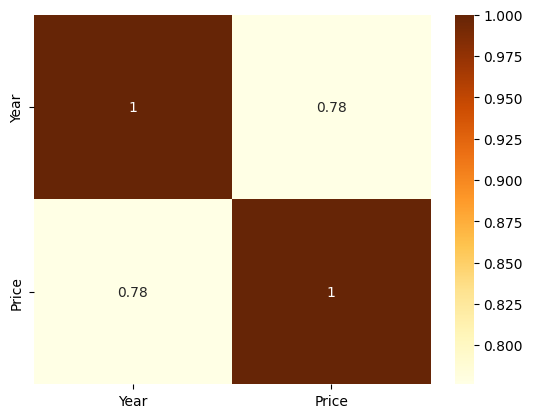

In [10]:
#to visualize this correlation as heatmap
corr_matrix=data.corr()
sns.heatmap(corr_matrix,annot=True,cmap='YlOrBr')

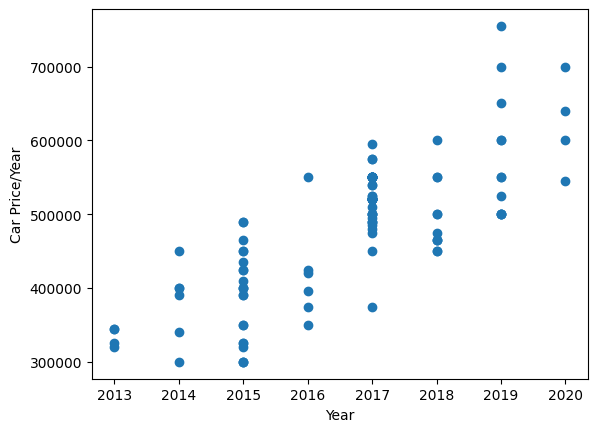

In [11]:
#creating scatter plot of Car price Vs Year
plt.scatter(data['Year'],data['Price'],)
plt.xlabel("Year")
plt.ylabel("Car Price/Year")
plt.title('')
plt.show()

#Defining X and Y

In [13]:
#Defining X and Y
x=data.drop('Price',axis=1)
y=data['Price']

In [14]:
x.head()

,Year
0,2018
1,2019
2,2019
3,2018
4,2018


In [15]:
y.head()

0    465000
1    755000
2    700000
3    465000
4    465000
Name: Price, dtype: int64

In [16]:
x_train=x.values.reshape(-1,1)
y_train=y.values.reshape(-1,1)
x_test=x.values.reshape(-1,1)
y_test=y.values.reshape(-1,1)

#train ad test split

In [17]:

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [18]:
data.shape

(112, 2)

#model creation phase


**Linear regression**

In [19]:

from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [20]:
model=lr.fit(x_train,y_train)

In [23]:
#predicting value
y_pred=model.predict(x_test)

#Evaluating the model

In [22]:

from sklearn.metrics import mean_squared_error,r2_score
lr1=mean_squared_error(y_test,y_pred)
lr1

4326906256.829671

In [24]:
r_value=r2_score(y_test,y_pred)
r_value

0.36759313425902185


#lasso regression

In [25]:

from sklearn.linear_model import Lasso
lo=Lasso()

In [26]:
model_lo=lo.fit(x_train,y_train)

In [27]:
y_pred_lo=model_lo.predict(x_test)

In [28]:
lo1=mean_squared_error(y_test,y_pred_lo)
lo1

4326859771.015669

In [29]:
r2_score(y_test,y_pred_lo)

0.3675999284778446

**Predicting the price of 2022 model second-hand grand i10**

In [31]:
year_2022=[[2022]]

In [32]:
linear_price_2022=model.predict(year_2022)
lasso_price_2022=model_lo.predict(year_2022)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but Lasso was fitted with feature names
  warnings.warn(


In [33]:
print("predicted price for 2022 model second-hand grand i10 using Linear regression",linear_price_2022 )

predicted price for 2022 model second-hand grand i10 using Linear regression [743601.61594504]


In [34]:
print("predicted price for 2022 model second-hand grand i10 using Lasso regression",lasso_price_2022 )

predicted price for 2022 model second-hand grand i10 using Lasso regression [743599.37427144]


**Check Perfomance of two model with their mse.**
Here,Assuming less mse than oter indicates better perfomance

In [30]:
if lr1 < lo1:
  print("Linear regression performs better")
else:
  print("Lasso regression performs better")

Lasso regression performs better
